In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import cdlib
import dynetx as dn
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from cdlib import algorithms, evaluation
from cdlib import TemporalClustering

set2 = sns.color_palette('Dark2')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'karateclub', 'leidenalg'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


In [4]:
df1 = pd.read_csv("../data_collection/data_biden/df_primoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df2 = pd.read_csv("../data_collection/data_biden/df_secondoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df3 = pd.read_csv("../data_collection/data_biden/df_terzoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df4 = pd.read_csv("../data_collection/data_biden/df_quartoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df5 =pd.read_csv("../data_collection/data_biden/df_quintoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)

In [5]:
del df1['Unnamed: 0']
del df1['id_mittente']
del df1['id_ricevente']

del df2['Unnamed: 0']
del df2['id_mittente']
del df2['id_ricevente']

del df3['Unnamed: 0']
del df3['id_mittente']
del df3['id_ricevente']

del df4['Unnamed: 0']
del df4['id_mittente']
del df4['id_ricevente']

del df5['Unnamed: 0']
del df5['id_mittente']
del df5['id_ricevente']

In [6]:
df1.username_mittente = df1.username_mittente.astype(str)
df1.username_ricevente = df1.username_ricevente.astype(str)
df2.username_mittente = df2.username_mittente.astype(str)
df2.username_ricevente = df2.username_ricevente.astype(str)
df3.username_mittente = df3.username_mittente.astype(str)
df3.username_ricevente = df3.username_ricevente.astype(str)
df4.username_mittente = df4.username_mittente.astype(str)
df4.username_ricevente = df4.username_ricevente.astype(str)
df5.username_mittente = df5.username_mittente.astype(str)
df5.username_ricevente = df5.username_ricevente.astype(str)

In [7]:
g1 = nx.from_pandas_edgelist(df1, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g1 = g1.to_undirected() 

g2 = nx.from_pandas_edgelist(df2, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g2 = g2.to_undirected() 

g3 = nx.from_pandas_edgelist(df3, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g3 = g3.to_undirected() 

g4 = nx.from_pandas_edgelist(df4, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g4 = g4.to_undirected() 

g5 = nx.from_pandas_edgelist(df5, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g5 = g5.to_undirected() 

In [10]:
df1_usernameMittente = list(set(list(df1['username_mittente'])))
df1_usernameRicevente = list(set(list(df1['username_ricevente'])))

In [11]:
nodi_df1 = df1_usernameMittente + df1_usernameRicevente

In [12]:
df2_usernameMittente = list(set(list(df2['username_mittente'])))
df2_usernameRicevente = list(set(list(df2['username_ricevente'])))

In [13]:
nodi_df2 = df2_usernameMittente + df2_usernameRicevente

In [14]:
nodi_comuni_df1_df2 = set(nodi_df1) & set(nodi_df2)

In [15]:
len(nodi_comuni_df1_df2)

1663

In [16]:
g1.number_of_nodes()

8618

In [17]:
g2.number_of_nodes()

7420

### Trovo i biggest cc

In [18]:
comps1 = list(nx.connected_components(g1))
print("Number of connected components: ", len(comps1))
comps2 = list(nx.connected_components(g2))
print("Number of connected components: ", len(comps2))
comps3 = list(nx.connected_components(g3))
print("Number of connected components: ", len(comps3))
comps4 = list(nx.connected_components(g4))
print("Number of connected components: ", len(comps4))
comps5 = list(nx.connected_components(g5))
print("Number of connected components: ", len(comps5))


Number of connected components:  427
Number of connected components:  496
Number of connected components:  492
Number of connected components:  470
Number of connected components:  469


In [19]:
comps_sorted1 = sorted(comps1, key=len, reverse = True)
comps_sorted2 = sorted(comps2, key=len, reverse = True)
comps_sorted3 = sorted(comps3, key=len, reverse = True)
comps_sorted4 = sorted(comps4, key=len, reverse = True)
comps_sorted5 = sorted(comps5, key=len, reverse = True)

In [20]:
print("Number of nodes/users in the biggest connected component: ", len(max(comps_sorted1)))
print("Number of nodes/users in the biggest connected component: ", len(max(comps_sorted2)))
print("Number of nodes/users in the biggest connected component: ", len(max(comps_sorted3)))
print("Number of nodes/users in the biggest connected component: ", len(max(comps_sorted4)))
print("Number of nodes/users in the biggest connected component: ", len(max(comps_sorted5)))

Number of nodes/users in the biggest connected component:  7430
Number of nodes/users in the biggest connected component:  6084
Number of nodes/users in the biggest connected component:  3144
Number of nodes/users in the biggest connected component:  2531
Number of nodes/users in the biggest connected component:  2024


In [21]:
bcc1 = nx.subgraph(g1, comps_sorted1[0]) 
bcc2 = nx.subgraph(g2, comps_sorted2[0]) 
bcc3 = nx.subgraph(g3, comps_sorted3[0]) 
bcc4 = nx.subgraph(g4, comps_sorted4[0]) 
bcc5 = nx.subgraph(g5, comps_sorted5[0]) 

### Louvain

In [90]:
tc = TemporalClustering()

In [91]:
coms1 = algorithms.louvain(bcc1)  
tc.add_clustering(coms1, 1)

In [92]:
coms2 = algorithms.louvain(bcc2)  
tc.add_clustering(coms2, 2)

In [93]:
coms3 = algorithms.louvain(bcc3)  
tc.add_clustering(coms3, 3)

In [94]:
coms4 = algorithms.louvain(bcc4)  
tc.add_clustering(coms4, 4)

In [95]:
coms5 = algorithms.louvain(bcc5)  
tc.add_clustering(coms5, 5)

In [96]:
tc.get_observation_ids()

[1, 2, 3, 4, 5]

In [97]:
for i in tc.get_observation_ids():
    print(len(tc.get_clustering_at(i).communities))

51
46
42
37
40


In [98]:
trend = tc.clustering_stability_trend(evaluation.nf1)
trend

[0.009636070853462157,
 0.011207729468599032,
 0.014189189189189187,
 0.024821021021021024]

In [99]:
tc.has_explicit_match()

False

In [100]:
jaccard = lambda x, y: len(set(x) & set(y)) / len(set(x) | set(y))

In [101]:
matches = tc.community_matching(jaccard, two_sided=True)

In [102]:
f"Example of community match: {matches[0]}"

"Example of community match: ('1_0', '2_0', 0.02099737532808399)"

In [103]:
c1 = tc.get_clustering_at(1).named_communities[matches[0][0]]
c1

['realDonaldTrump',
 'scienceinvestme',
 'stickerdeep',
 'GOPChairwoman',
 'iris2856',
 'jphoganorg',
 'michaelvabeach',
 'joebobmr',
 'johnbufford',
 'funnymcmurray',
 'zemanlynnz',
 'andyostroy',
 'arcofhope',
 'WhiteHouse',
 'u2ihear',
 'mc_eades',
 '20michael17',
 'POTUS',
 'mtvnewbiz',
 'gjallarhornet',
 'XochitlHinojosa',
 'pirateladyjane',
 'digicarla',
 'LindseyGrahamSC',
 'lucykaos',
 'IvankaTrump',
 'kbanuba',
 'nothin_personal',
 'andrew00041995',
 'Politidope',
 'itsdancooper',
 'hcs719',
 'cantbesilenced1',
 'gotklss2',
 'GOP',
 'BreitbartNews',
 'VP',
 'glenthecreator',
 'tonetalks',
 'OANN',
 'rr7lv',
 'RealCandaceO',
 'Nada_Reelnaim',
 'America23436552',
 'chucktodd',
 'frensfrens',
 'fritzinmo',
 'DevinNunes',
 'newenglander54',
 'GOPLeader',
 'oppose45',
 '1sallee1',
 'jimmykokinakes',
 'mattgaetz',
 'FoxNews',
 'richardmcneil17',
 'oeivindlundberg',
 'jeweler46',
 'hachiko1614',
 'mtnpoet',
 'smanofsteel76',
 'hopemaga',
 'DanHenninger',
 'innerpe18386607',
 'bmance1

In [104]:
len(c1)

620

In [105]:
c2 = tc.get_clustering_at(2).named_communities[matches[0][1]]
c2

['realDonaldTrump',
 'drmiltenberger',
 '509shawng',
 'tedlieu',
 'bh_properties',
 'WhiteHouse',
 'scrawfordpaul',
 'iris2856',
 'silentmoments',
 'dizlexic',
 'pelantaro3',
 'funnymcmurray',
 'haldonahue',
 'wc_fox',
 'TeamTrump',
 'livesmatter911',
 'Mike_Pence',
 'ellenost',
 'ryansmithman',
 'KellyannePolls',
 'fritzinmo',
 'TrumpWarRoom',
 'middleeast_code',
 'FLOTUS',
 'naveed_a_khan19',
 'business',
 'OANN',
 'thedumbingofusa',
 'becbarr_',
 'nolagirlsaint',
 'BrianKempGA',
 'NBCNews',
 'billydenham1',
 'rjseeker1',
 'the__rapier',
 'tessa78580910',
 'schachin',
 'breitbarpht',
 'usajoejrp34',
 'lisy_lisar',
 'DavidBegnaud',
 'peeppeeparoo',
 'laplantemerita',
 'empowergracewi',
 'larrywthomas1',
 'mytiffylady',
 'davidmorris1984',
 'VP',
 'klyde0scope',
 'kristomusumano',
 'andyostroy',
 'ecat28',
 'jsmbodywork',
 'ramsesgust',
 'americanmom01',
 'guyzlkeme',
 'kurtbardella',
 'nativepolicyllc',
 'ali',
 'schmaviddaily',
 'OliviaMastro1',
 'mrtweeterverse',
 'naveen_bhim',
 'W

In [106]:
len(c2)

547

In [107]:
set(c1) & set(c2)

{'JeffreyGuterman',
 'KellyannePolls',
 'OANN',
 'TeamTrump',
 'USDOT',
 'VP',
 'WhiteHouse',
 'alexct9',
 'alexsalvinews',
 'andyostroy',
 'fritzinmo',
 'funnymcmurray',
 'guyfair1',
 'haldonahue',
 'hopemaga',
 'iris2856',
 'jmleeds',
 'klyde0scope',
 'mhhoward_al',
 'middleeast_code',
 'phil_neilsen',
 'realDonaldTrump',
 'stickerdeep',
 'zemanlynnz'}

In [108]:
jaccard(c1,c2)

0.02099737532808399

In [109]:
com_polytree = tc.lifecycle_polytree(jaccard)

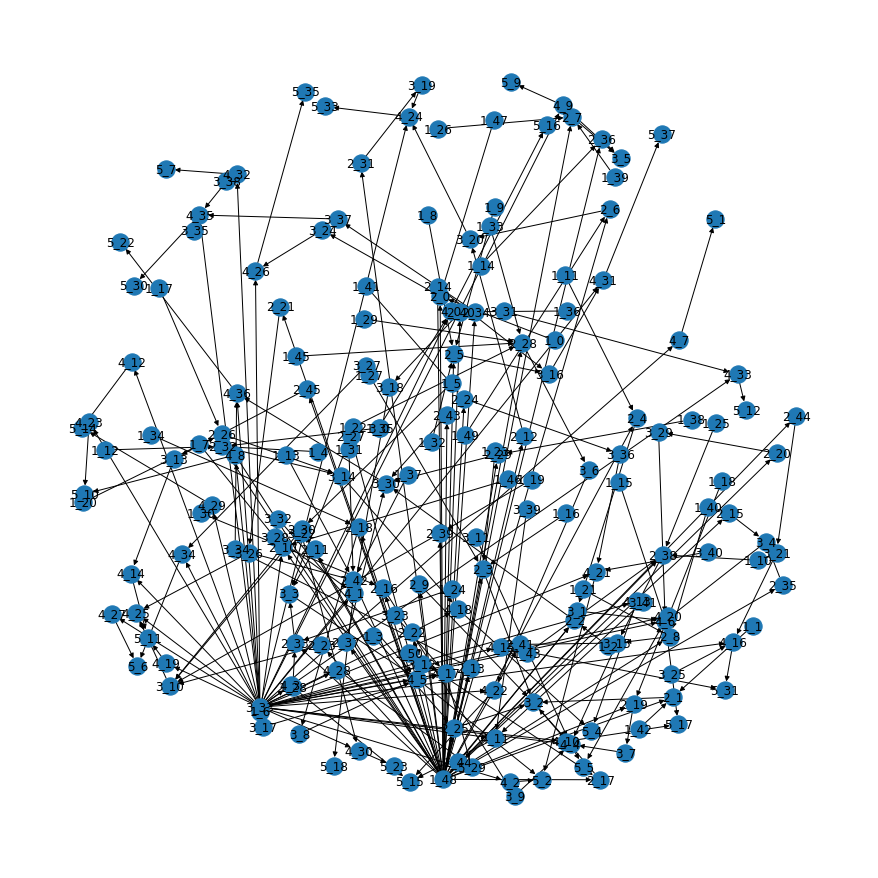

In [250]:
for nodes in nx.weakly_connected_components(com_polytree):
    sub =  com_polytree.subgraph(nodes)
    plt.figure(3,figsize=(12,12)) 
    nx.draw(sub, pos=nx.spring_layout(sub), with_labels=True) 

In [276]:
weak_comp = list(nx.weakly_connected_components(com_polytree))[0]
x = com_polytree.copy()
x.remove_nodes_from([n for n in com_polytree.nodes() if n not in weak_comp])

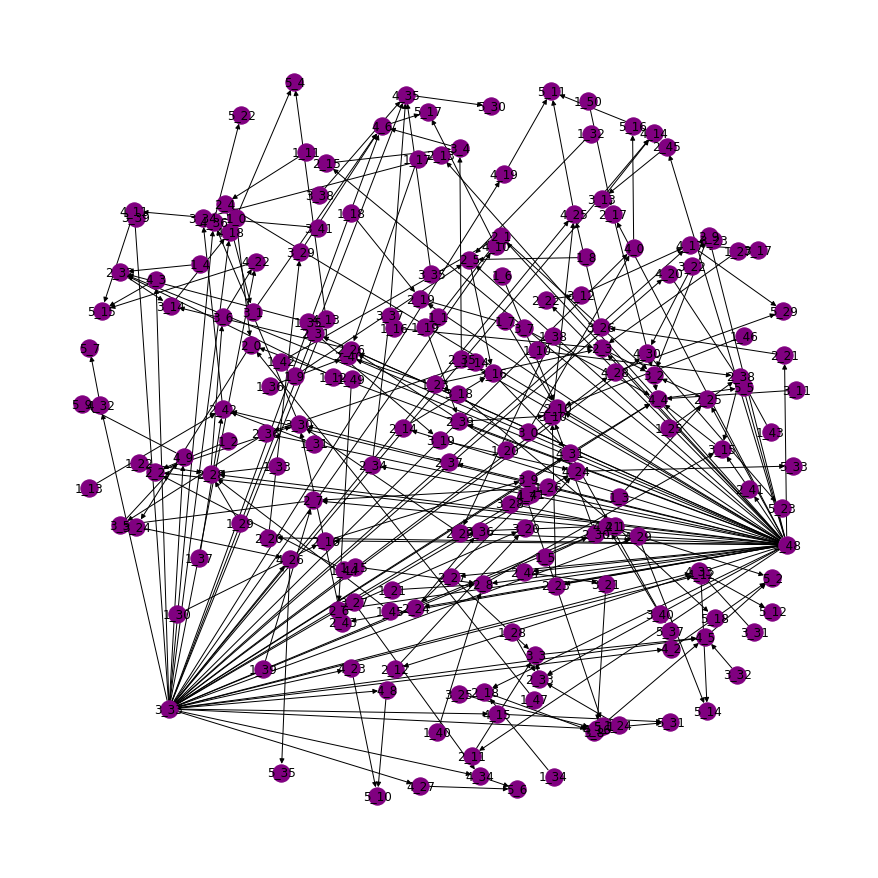

In [277]:
plt.figure(3,figsize=(12,12)) 
nx.draw(x, pos=nx.spring_layout(x), with_labels=True, node_color = "purple") 

In [278]:
nx.write_gexf(x, "Biden_polytree.gexf")

In [110]:
dict_com_1 = {}
dict_com_2 = {}
dict_com_3 = {}
dict_com_4 = {}
dict_com_5 = {}
lista_dict = [dict_com_1, dict_com_2, dict_com_3, dict_com_4, dict_com_5]

for i in tc.get_observation_ids():
    community = {}
    diz_comm = tc.get_clustering_at(i).named_communities
    for el in diz_comm:
        community[el] =  diz_comm[el]
    dizionario = lista_dict[i-1]    
    dizionario[i] = community


In [111]:
df_plot1 = to_dictionary_to_plot(dict_com_1)
df_plot2 = to_dictionary_to_plot(dict_com_2)
df_plot3 = to_dictionary_to_plot(dict_com_3)
df_plot4 = to_dictionary_to_plot(dict_com_4)
df_plot5 = to_dictionary_to_plot(dict_com_5)

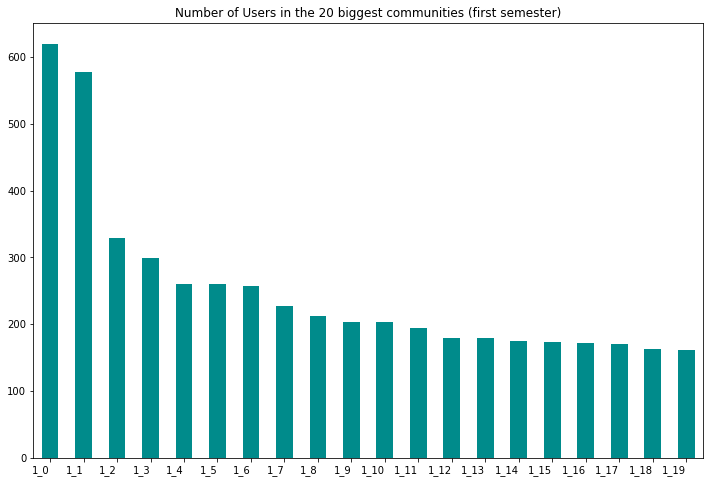

In [112]:
plot_dimensions(df_plot1, "first")

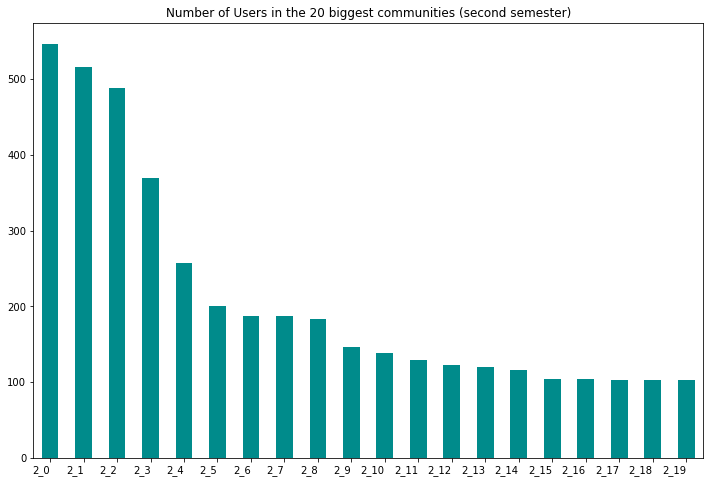

In [113]:
plot_dimensions(df_plot2, "second")

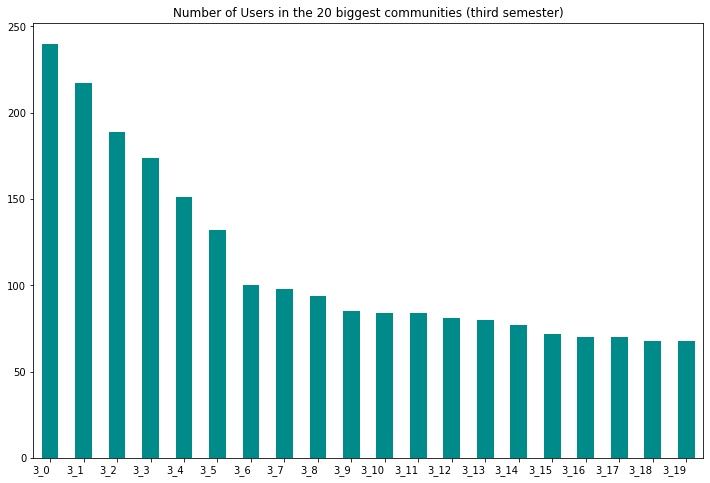

In [114]:
plot_dimensions(df_plot3, "third")

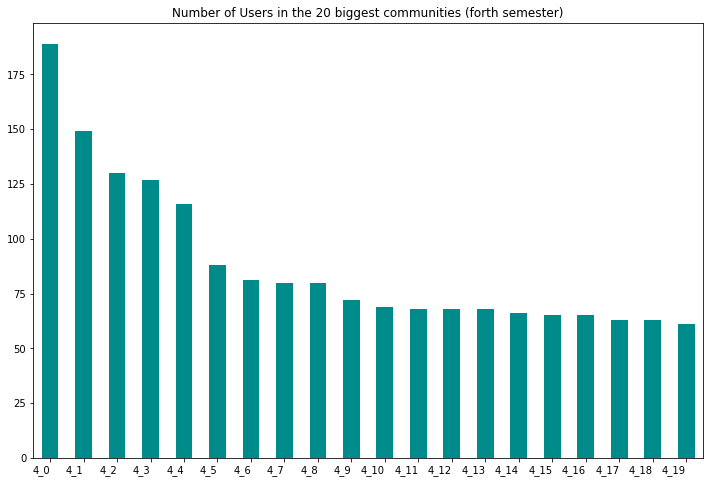

In [115]:
plot_dimensions(df_plot4, "forth")

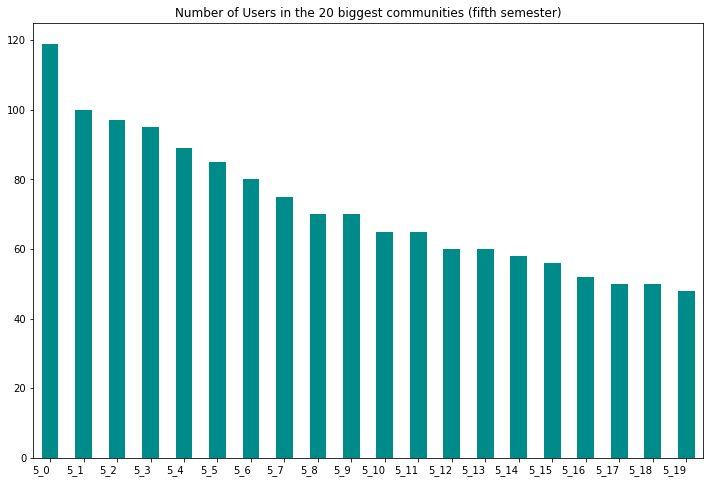

In [116]:
plot_dimensions(df_plot5, "fifth")

### Label Propagation

In [135]:
tc = TemporalClustering()

In [136]:
coms1 = algorithms.label_propagation(bcc1)  
tc.add_clustering(coms1, 1)

In [137]:
coms2 = algorithms.label_propagation(bcc2)  
tc.add_clustering(coms2, 2)

In [138]:
coms3 = algorithms.label_propagation(bcc3)  
tc.add_clustering(coms3, 3)

In [139]:
coms4 = algorithms.label_propagation(bcc4)  
tc.add_clustering(coms4, 4)

In [140]:
coms5 = algorithms.label_propagation(bcc5)  
tc.add_clustering(coms5, 5)

In [141]:
tc.get_observation_ids()

[1, 2, 3, 4, 5]

In [142]:
for i in tc.get_observation_ids():
    print(len(tc.get_clustering_at(i).communities))

1272
1135
591
503
421


In [143]:
trend = tc.clustering_stability_trend(evaluation.nf1)
trend

[0.03716909237713586,
 0.0294332220638043,
 0.05118737125347456,
 0.04924035295060257]

In [144]:
tc.has_explicit_match()

False

In [145]:
matches = tc.community_matching(jaccard, two_sided=True)

In [146]:
f"Example of community match: {matches[0]}"

"Example of community match: ('1_0', '2_0', 0.020496224379719527)"

## Tiles

In [219]:
dg = dn.DynGraph()

In [220]:
dg.add_interactions_from(list(bcc1.edges()), t=1)
dg.add_interactions_from(list(bcc2.edges()), t=2)
dg.add_interactions_from(list(bcc3.edges()), t=3)
dg.add_interactions_from(list(bcc4.edges()), t=4)
dg.add_interactions_from(list(bcc5.edges()), t=5)

In [221]:
tc = TemporalClustering()

In [222]:
tc = algorithms.tiles(dg, obs=1)

In [223]:
tc.get_observation_ids()

[1, 2, 3, 4, 5]

In [224]:
for i in tc.get_observation_ids():
    print(len(tc.get_clustering_at(i).communities))

16
24
29
34
36


In [225]:
type(tc.get_clustering_at(1))

cdlib.classes.named_clustering.NamedClustering

In [226]:
tc.get_clustering_at(2).named_communities.keys()

dict_keys(['2_0', '2_1', '2_2', '2_3', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_14', '2_15', '2_16', '2_17', '2_18', '2_19', '2_20', '2_21', '2_22', '2_23'])

In [227]:
tc.has_explicit_match()

True

In [228]:
match = tc.get_explicit_community_match()

In [229]:
trend = tc.clustering_stability_trend(evaluation.nf1)
trend


[0.5029166666666667, 0.6062068965517242, 0.6208823529411767, 0.662156862745098]

In [230]:
def to_dictionary_to_plot(dict_com):
    df = pd.DataFrame.from_dict(dict_com, orient='index')
    df = df.transpose()
    df['len_community'] = [len(x) for x in df.iloc[:,0]]
    return df

In [231]:
dict_com_1 = {}
dict_com_2 = {}
dict_com_3 = {}
dict_com_4 = {}
dict_com_5 = {}
lista_dict = [dict_com_1, dict_com_2, dict_com_3, dict_com_4, dict_com_5]

for i in tc.get_observation_ids():
    community = {}
    diz_comm = tc.get_clustering_at(i).named_communities
    for el in diz_comm:
        community[el] =  diz_comm[el]
    dizionario = lista_dict[i-1]    
    dizionario[i] = community


In [232]:
df_plot1 = to_dictionary_to_plot(dict_com_1)
df_plot2 = to_dictionary_to_plot(dict_com_2)
df_plot3 = to_dictionary_to_plot(dict_com_3)
df_plot4 = to_dictionary_to_plot(dict_com_4)
df_plot5 = to_dictionary_to_plot(dict_com_5)

In [233]:
def plot_dimensions(df, i):
    plt.figure(figsize=(12,8))
    df.len_community.head(20).plot(kind = 'bar', color = "darkcyan")
    plt.xticks(rotation=0, ha='right')
    plt.title(f"Number of Users in the 20 biggest communities ({i} semester)")

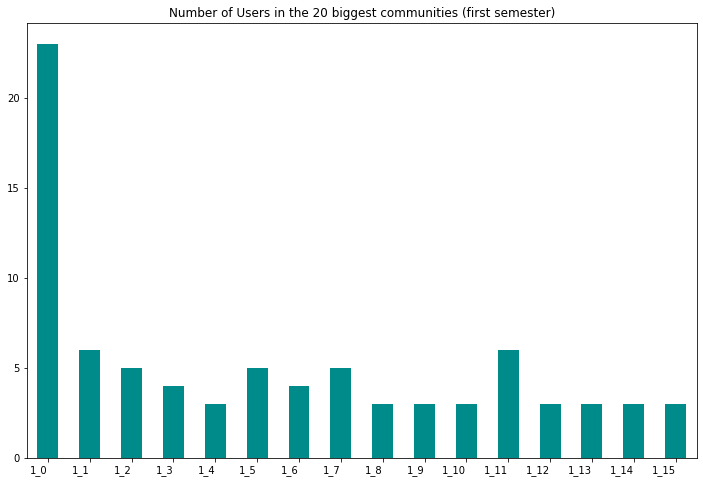

In [234]:
plot_dimensions(df_plot1, "first")

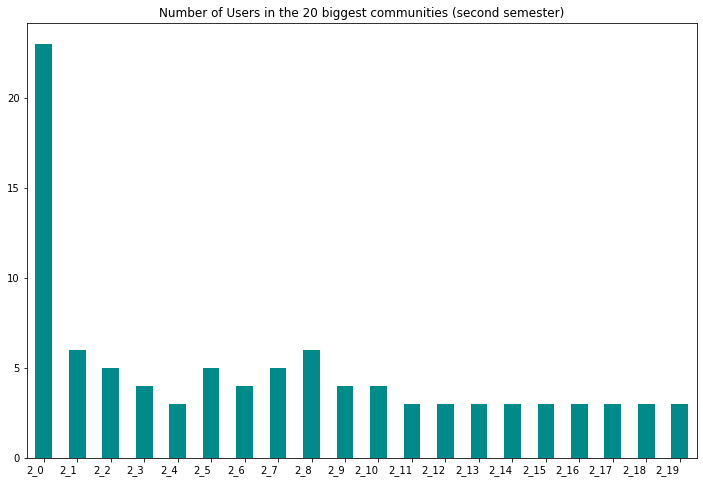

In [235]:
plot_dimensions(df_plot2, "second")

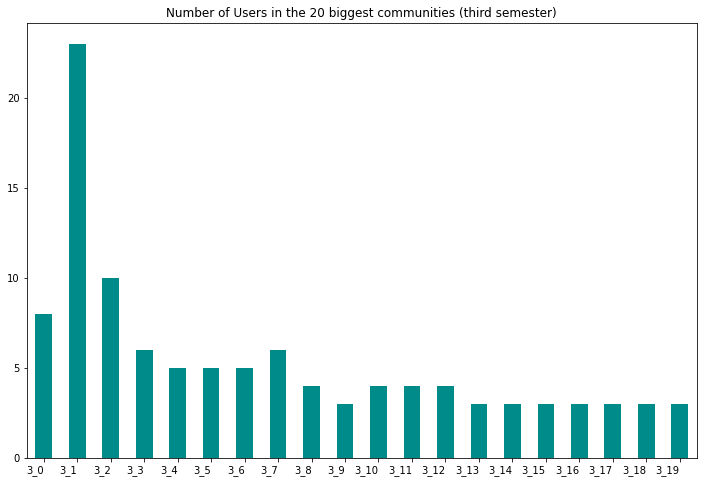

In [236]:
plot_dimensions(df_plot3, "third")

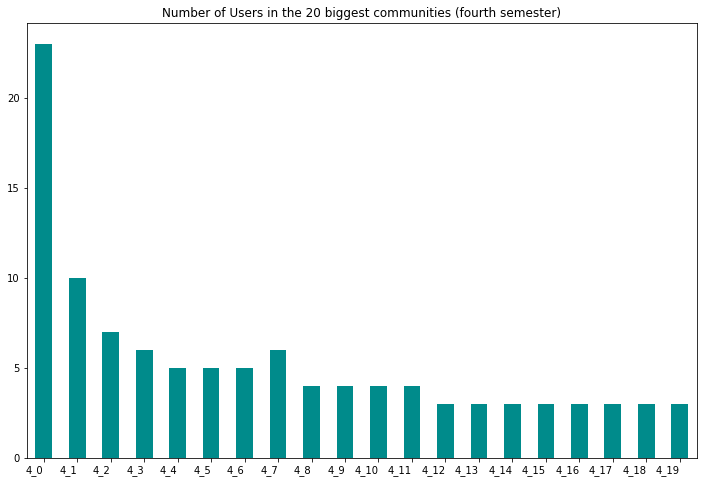

In [237]:
plot_dimensions(df_plot4, "fourth")

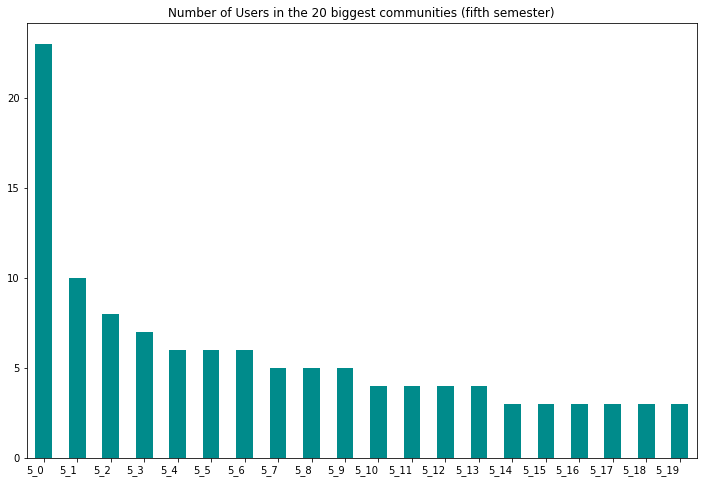

In [238]:
plot_dimensions(df_plot5, "fifth")